In [2]:
%matplotlib inline

import os
import pandas as pd
import seaborn as sns

In [4]:
# Set path where file is stored
f = 'data/liv_pop.csv'
# Read in file and set an index column
db = pd.read_csv(f, index_col='GeographyCode')

In [5]:
# See first five records
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


In [6]:
# See last five records
db.tail()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01033764,2106,32,49,15,0
E01033765,1277,21,33,17,3
E01033766,1028,12,20,8,7
E01033767,1003,29,29,5,1
E01033768,1016,69,111,21,6


In [7]:
# Get some info about the table
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 5 columns):
Europe                            298 non-null int64
Africa                            298 non-null int64
Middle East and Asia              298 non-null int64
The Americas and the Caribbean    298 non-null int64
Antarctica and Oceania            298 non-null int64
dtypes: int64(5)
memory usage: 14.0+ KB


In [9]:
# Get an overview of the values in the table
db.describe()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
count,298.00000,298.000000,298.000000,298.000000,298.000000
mean,1462.38255,29.818792,62.909396,8.087248,1.949664
std,248.67329,51.606065,102.519614,9.397638,2.168216
min,731.00000,0.000000,1.000000,0.000000,0.000000
25%,1331.25000,7.000000,16.000000,2.000000,0.000000
50%,1446.00000,14.000000,33.500000,5.000000,1.000000
75%,1579.75000,30.000000,62.750000,10.000000,3.000000
max,2551.00000,484.000000,840.000000,61.000000,11.000000


In [10]:
# Transpose the summary
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Europe,298.0,1462.382550,248.673290,731.0,1331.25,1446.0,1579.75,2551.0
Africa,298.0,29.818792,51.606065,0.0,7.00,14.0,30.00,484.0
Middle East and Asia,298.0,62.909396,102.519614,1.0,16.00,33.5,62.75,840.0
The Americas and the Caribbean,298.0,8.087248,9.397638,0.0,2.00,5.0,10.00,61.0
Antarctica and Oceania,298.0,1.949664,2.168216,0.0,0.00,1.0,3.00,11.0


In [11]:
# Get the min values for each country
db.min()

Europe                            731
Africa                              0
Middle East and Asia                1
The Americas and the Caribbean      0
Antarctica and Oceania              0
dtype: int64

In [12]:
# Get the minimum value for a particular column
db['Europe'].min()

731

In [13]:
# Get the standard deviation for for 'E01006512' which is an LSOA
db.loc['E01006512'].std()

457.8842648530303

In [14]:
# Calculate total population for each LSOA, long way 
total = db['Europe'] + db['Africa'] + db['Middle East and Asia'] + \
        db['The Americas and the Caribbean'] + db['Antarctica and Oceania']
# Print the top of the variable
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

In [15]:
# Calculate total population for each LSOA, short way using axis 
total = db.sum(axis=1)
total.head()

GeographyCode
E01006512    1880
E01006513    2941
E01006514    2108
E01006515    1208
E01006518    1696
dtype: int64

In [16]:
# Add this variable to the DataFrame
db['Total'] = total
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


In [17]:
# Add a new column of just ones to the table
db['ones'] = 1
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,1
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


In [19]:
# Modify ones value for certain LSOA
db.loc['E01006512', 'ones'] = 3
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total,ones
GeographyCode,,,,,,,
E01006512,910,106,840,24,0,1880,3
E01006513,2225,61,595,53,7,2941,1
E01006514,1786,63,193,61,5,2108,1
E01006515,974,29,185,18,2,1208,1
E01006518,1531,69,73,19,4,1696,1


In [21]:
# Get rid of that ones column
del db['ones']
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


In [22]:
# Extract the total and European population of the first four areas 
# in the table, we use loc with lists:
eu_tot_first4 = db.loc[['E01006512', 'E01006513', 'E01006514', 'E01006515']
                       ,['Total', 'Europe']]
eu_tot_first4.head()

,Total,Europe
GeographyCode,,
E01006512,1880,910
E01006513,2941,2225
E01006514,2108,1786
E01006515,1208,974


In [23]:
# Areas with a total pop greater than 2500
mk5 = db.loc[db['Total'] > 2500, :]
mk5.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006513,2225,61,595,53,7,2941
E01006747,2551,163,812,24,2,3552
E01006751,1843,139,568,21,1,2572


In [24]:
# Areas with no more than 750 Europeans
nm5ke = db.loc[db['Europe'] < 750, :]
nm5ke

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033757,731,39,223,29,3,1025


In [25]:
# Areas with exactly 10 persons for Antaractica and Oceania
oneOA = db.loc[db['Antarctica and Oceania'] == 10]
oneOA

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006679,1353,484,354,31,10,2232


In [28]:
# Areas where European population is less than 1/2 the population
eu_lth = db.loc[(db['Europe'] *100 / db['Total']) < 50, : ]
eu_lth

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880


In [33]:
# Areas with > 25 people from Americas and Caribean but less than 1500 total
ac25_l1500 = db.loc[(db['The Americas and the Caribbean'] > 25) & 
                    (db['Total'] < 1500), :]
ac25_l1500

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01033750,1235,53,129,26,5,1448
E01033752,1024,19,114,33,6,1196
E01033754,1262,37,112,32,9,1452
E01033756,886,31,221,42,5,1185
E01033757,731,39,223,29,3,1025
E01033761,1138,52,138,33,11,1372


In [35]:
# Sort the DataFrame by Total Population
db_pop_sorted = db.sort_values('Total', ascending=False)
db_pop_sorted.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


In [37]:
# Sort on multiple columns
db_pop_multi_sort = db.sort_values(['Total', 'GeographyCode'], ascending=False)
db_pop_multi_sort.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006747,2551,163,812,24,2,3552
E01006513,2225,61,595,53,7,2941
E01006751,1843,139,568,21,1,2572
E01006524,2235,36,125,24,11,2431
E01006787,2187,53,75,13,2,2330


/home/mjb/anaconda3/envs/darribasLab01/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


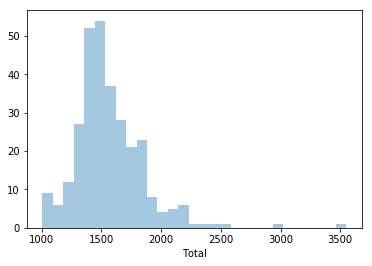

In [38]:
# Create a histogram of the Total column with seaborn
_ = sns.distplot(db['Total'], kde=False)

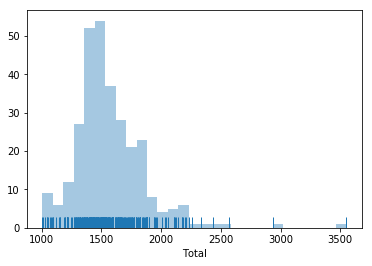

In [39]:
# See density of values with rug which adds a tick for each value
_ = sns.distplot(db['Total'], kde=False, rug=True)

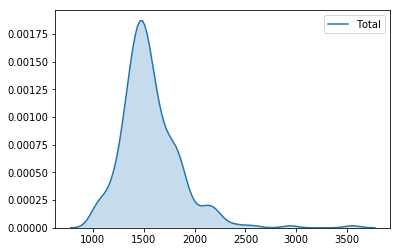

In [41]:
# Kernel density plot
_ = sns.kdeplot(db['Total'], shade=True)

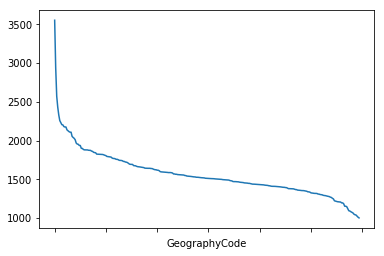

In [43]:
# Line plot of the sorted total population
_ = db['Total'].sort_values(ascending=False).plot()

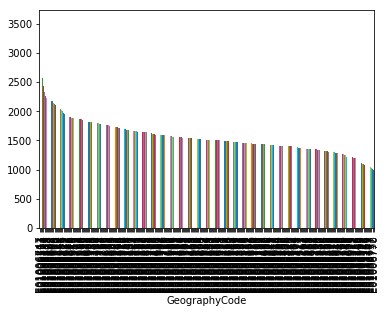

In [45]:
# Bar chart of same 
_ = db['Total'].sort_values(ascending=False).plot(kind='bar')

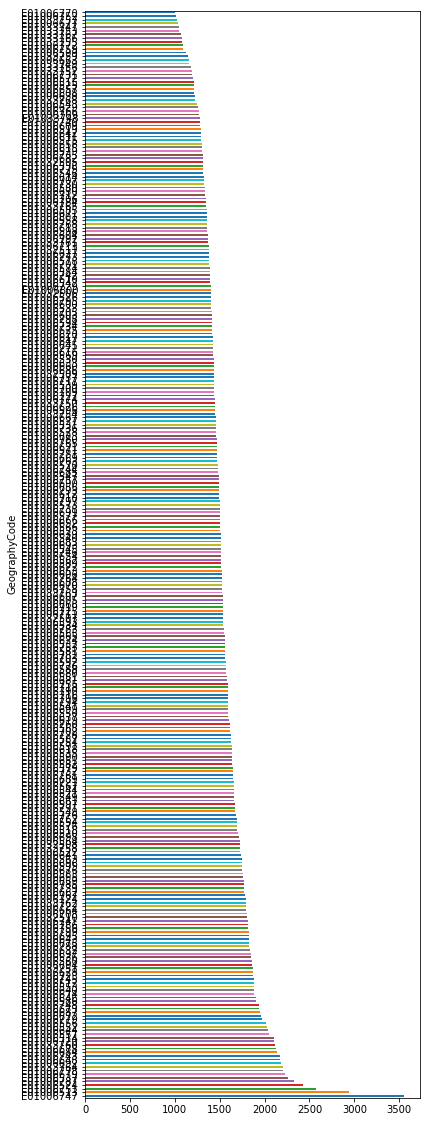

In [47]:
# Flip it and change fig size
_ = db['Total'].sort_values(ascending=False).plot(kind='barh', figsize=(6,20))

In [48]:
# Begin tidying up our data
db.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania,Total
GeographyCode,,,,,,
E01006512,910,106,840,24,0,1880
E01006513,2225,61,595,53,7,2941
E01006514,1786,63,193,61,5,2108
E01006515,974,29,185,18,2,1208
E01006518,1531,69,73,19,4,1696


In [49]:
# Assign the Totals column to it's own single-column DataFrame
db_totals = db[['Total']]
db_totals.head()

,Total
GeographyCode,
E01006512,1880
E01006513,2941
E01006514,2108
E01006515,1208
E01006518,1696


In [50]:
# Create a subgroups DataFrame for everything but Total
db_subgroups = db.drop('Total', axis=1)
db_subgroups.head()

,Europe,Africa,Middle East and Asia,The Americas and the Caribbean,Antarctica and Oceania
GeographyCode,,,,,
E01006512,910,106,840,24,0
E01006513,2225,61,595,53,7
E01006514,1786,63,193,61,5
E01006515,974,29,185,18,2
E01006518,1531,69,73,19,4


In [51]:
# Create a row for each country and LSOA
tidy_subgroups = db_subgroups.stack()
tidy_subgroups.head()

GeographyCode                                
E01006512      Europe                            910
               Africa                            106
               Middle East and Asia              840
               The Americas and the Caribbean     24
               Antarctica and Oceania              0
dtype: int64

In [52]:
type(tidy_subgroups)

pandas.core.series.Series

In [53]:
# Create a DataFrame of the tidy_subgroup
# Unfold the multi-index (geocode, popgroup) into different, new columns
tidy_subgroupsDF = tidy_subgroups.reset_index()
tidy_subgroupsDF.head()

,GeographyCode,level_1,0
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


In [54]:
# Rename our columns
tidy_subgroupsDF = tidy_subgroupsDF.rename(columns={'level_1' : 'Subgroup', 0: 'Freq'})
tidy_subgroupsDF.head()

,GeographyCode,Subgroup,Freq
0,E01006512,Europe,910
1,E01006512,Africa,106
2,E01006512,Middle East and Asia,840
3,E01006512,The Americas and the Caribbean,24
4,E01006512,Antarctica and Oceania,0


In [55]:
# Group by our DataFrame
pop_grouped = tidy_subgroupsDF.groupby('Subgroup')
pop_grouped

In [56]:
# Get the sums for each subgroup
pop_grouped.sum()

,Freq
Subgroup,
Africa,8886
Antarctica and Oceania,581
Europe,435790
Middle East and Asia,18747
The Americas and the Caribbean,2410


In [57]:
# Get a summary of each group
pop_grouped.describe()

Freq                                  \
                                count         mean         std    min   
Subgroup                                                                
Africa                          298.0    29.818792   51.606065    0.0   
Antarctica and Oceania          298.0     1.949664    2.168216    0.0   
Europe                          298.0  1462.382550  248.673290  731.0   
Middle East and Asia            298.0    62.909396  102.519614    1.0   
The Americas and the Caribbean  298.0     8.087248    9.397638    0.0   

                                                                  
                                    25%     50%      75%     max  
Subgroup                                                          
Africa                             7.00    14.0    30.00   484.0  
Antarctica and Oceania             0.00     1.0     3.00    11.0  
Europe                          1331.25  1446.0  1579.75  2551.0  
Middle East and Asia              16.00    33.5    62.75   840.0  
The Americas and the Caribbean     2.00     5.0    10.00    61.0